
## Aufgabe 1
Bestimmen Sie ein Polynom dritten Grades, das folgende Eigenschaften erf&uuml;llt:  
<ul>
<li>Die Funktion besitzt ein Maximum im Punkt $(-2,3)$.</li>
<li>Der Graph der Funktion ber&uuml;hrt die Parabel $ f(x) = -x^2+2x+4 $ an der Stelle $ x = -1$.</li>
</ul>
Zeichnen Sie alle Eigenschaften sowie die zugeh&ouml;rige Funktion in einem Plot.  

In [1]:
var('a,b,c,d,x')
g(x) = a*x^3 + b*x^2 + c*x + d

In [1]:
eq1 = g(-2) == 3
eq2 = g.diff(x)(-2) == 0

In [1]:
f(x) = -x^2 + 2*x + 4
eq3 = g(-1) == f(-1)
eq4 = g.diff(x)(-1) == f.diff(x)(-1)

In [1]:
s = solve([eq1,eq2,eq3,eq4], [a,b,c,d], solution_dict=True); print s

In [1]:
p = plot(g.subs(s[0])(x), x,-3,0, color='red')
p += plot(f(x), x,-5,0)
p.show(ymin=-5,ymax=5)

## Aufgabe 2
Plotten Sie folgende Funktionen: <br>$$f:x\rightarrow \frac{4}{\pi}\sum_{n=0}^k{\frac{\sin((2n+1)x)}{2n+1}}$$<br> f&uuml;r $k=4\ldots15$. Legen Sie die Graphen &uuml;bereinander und nutzen Sie f&uuml;r jede Funktion eine andere Farbe (dies sollte am besten automatisch geschehen). Erstellen Sie auch eine Animation.  

In [1]:
reset()
var('x,n,k')
#Vorsicht: die summe wird dann sofort hier einmal ausgefuehrt, danach aber nicht mehr (und bleibt ein #"Summenobjekt"). Deswegen funktioniert es nicht auf diese Art.
f(n,x,k) = sum(sin((2*n+1)*x)/(2*n+1),n,0,k)*4/pi

In [1]:
def s(k): return 4/pi * sum([ sin((2*n+1)*x)/(2*n+1) for n in [0..k] ])
f = [s(k) for k in [4..15]]; f

In [1]:
plot(f, (x,-2,2))

In [1]:
print sorted(colors)

In [1]:
# Hexadezimale Farbwerte (wer es kennt!)
def rand_hex_col():
    n = ZZ(randint(0,16^6-1)).str(16)
    return '#'+(6-len(n))*'0'+n 
p = Graphics()
for findex in [0..len(f)-1]:
    p += plot(f[findex],color=rand_hex_col())
p.show()

In [1]:
p = Graphics() # erzeugt leeres Grafik-Objekt
for findex in [0..len(f)-1]:
    p += plot(f[findex],hue=findex/5)
p.show()

In [1]:
add([plot(s(k),hue=k/5) for k in [4..15]])

In [1]:
L = [plot(s(j),(x,-2,2)) for j in [4..15]]

In [1]:
animate(L).show(iterations=5)

In [1]:
var('x,n')
an = animate([plot(sum(sin((2*n+1)*x)/(2*n+1),n,0,k)*4/pi, (x,-5,5)) for k in [4..15]],ymin=-2,ymax=2) 
an.show(iterations=1)

## Aufgabe 3
Plotten Sie die Funktion $f:=x \rightarrow \left( \begin{array} {c} 5\cos(x)\\2\sin(x)\\4x \end{array} \right)$ f&uuml;r $0\leq x \leq 100$. W&auml;hlen Sie eine geeignete Aufl&ouml;sung.  

Erzeugen Sie weiterhin eine innere Spirale (durch Halbierung des Vor-Faktors bei x und y) und stellen Sie dann beide Spiralen als Fläche dar (ein oben und unten offener Torus).

In [1]:
reset()
%load_ext autoreload
%autoreload 2
from sageplotly import *

In [1]:
var('j')
outer = parametricplotline_ly([5*cos(j), 2*sin(j), 4*j], (j,0,100), points=200)
ishow3d([outer])

In [1]:
inner = parametricplotline_ly([2.5*cos(j), 1*sin(j), 4*j], (j,0,100), points=200)
ishow3d([inner])

In [1]:
ishow3d([outer,inner])

In [1]:
var('j,k')
ishow3d([parametricplot_ly ([2.5*cos(j), 1*sin(j), 4*k], (j, 0,2*3.14), (k,0,10), points= 30),
         parametricplot_ly ([1.2*cos(j), 0.5*sin(j), 4*k], (j, 0,2*3.14), (k,0,10), points= 30) ])

## Zusatzaufgabe: Aufgabe 4
Schreiben Sie eine Prozedur, die f&uuml;r eine Liste von Tupeln im $\mathbb{R}^3$ alle Dreiecke zwischen diesen Punkten zeichnet. Plotten Sie dann einen Oktaeder, d.h. eine Figur mit den Eckpunkten $\pm e_1,\pm e_2,\pm e_3 $.  

Verwenden Sie die folgenden beiden Wege:

* über Malen einzelner Dreiecke, die dann zusammengefügt werden. Ein einzelnes Dreieck kann man mit ```polygon3d_ly()``` malen.  
* unter Verwendung der Funktion ```sphere_ly()```

In [1]:
reset()
from sageplotly import *

In [2]:
def plot_dreiecke(l):
    ecken = Set(l)
    dreiecke = [s for s in ecken.subsets() if len(s)==3]
    p = list()
    for d in dreiecke:
        x,y,z = zip(*d)
        
        p.append(polygon3d_ly(x,y,z))
    ishow3d(p)
    
e1 = (1,0,0); e2 = (0,1,0); e3 = (0,0,1)
me1 = (-1,0,0); me2 = (0,-1,0); me3 = (0,0,-1)
plot_dreiecke([e1,e2,e3,me1,me2,me3])

In [3]:
ishow3d([sphere_ly(precision=5)])

<h2>Aufgabe 5</h2>
(Numerische Differentation)  
Schreiben Sie eine Funktion, die den Differenzenquotient $$d(x) = \frac{f(x+h)-f(x)}{h} $$ einer beliebigen analytischen Funktion an $n \in \mathbb{N}$ Stellen in einem vorgegebenen Intervall $[a,b] , a<b \in \mathbb{R}$ berechnet. Die Schrittweite $h$ kann entweder aus $\mathbb{R}$ gew&auml;hlt, oder durch $(b-a)/(n-1)$ berechnet werden.  
Bestimmen Sie den Fehler zu der exakten analytischen L&ouml;sung der Ableitung, und geben Sie die ausgerechneten Auswertestellen, die numerischen Ableitungen und den Fehler zur&uuml;ck. Dann ver&auml;ndern Sie die Anzahl der Punkte in einer for-Schleife und schauen sich danach den Fehler-Verlauf in einem Plot an. Am Schluss plotten Sie die beste Approximation, die analytische Ableitung und ihren Fehler in einem Plot.  

In [1]:
reset()
def diffquot(f,Intervall,nrPoints):
    g(x) = f.diff()
    fprime = [] 
    error = []
    #Schrittweite
    h = (Intervall[1]-Intervall[0])/(nrPoints-1) 
    points = srange(Intervall[0], Intervall[1],h,include_endpoint=True)
    for i in [0..nrPoints-2]:
        fprime.append( ((f(points[i+1]) - f(points[i]) )/h).n())
        error.append( (g(points[i]) - fprime[i]).n() )
    return points,fprime, error

In [1]:
f(x) = sin(x)

In [1]:
errorlist=[]
for nrp in range(10,1000,200):
    points,fprime, error = diffquot(f,(0,5),nrp)
    errorlist.append(norm(vector(error)))

In [1]:
point([(i,errorlist[i]) for i in [0..len(errorlist)-1]])

In [1]:
p = line(zip(points,fprime),legend_label='Differenzenquotient')
p += plot(f.diff(x),(0,5),color='green',legend_label='Ableitung')
p += line(zip(points,error),color='red',legend_label='Fehler')
p.show()

<h2>Aufgabe 6</h2>
Plotten Sie die Funktion $f:(x,y) \mapsto 0.1y^4 - 0.3y^3 - 1.5y^2 + \sin(3x) +1.9y +3$ als Fl&auml;che im dreidimensionalen Raum. Betrachten Sie ebenfalls die Konturen bei -2, 0, 2, 4 und 6. W&auml;hlen Sie jeweils geeignete Definitionsbereiche.  

In [1]:
reset()
from sageplotly import *

In [1]:
var('x,y')
f(x,y) = 0.1*y^4 - 0.3*y^3 - 1.5*y^2 + sin(3*x) + 1.9*y + 3

In [1]:
ishow3d([plot3d_ly(f(x,y), (x,-4,4), (y,-4,4))]) 

In [1]:
ishow3d([plotcontour_ly(f, (x,-4,4), (y,-4,4), contours=dict(start=-2,end=6,size=2))]) 

## Aufgabe 7
(Newton-Fraktal)  
Betrachten Sie das Newton-Verfahren zum Berechnen der Nullstellen von $z^3-1$, d.h.<br />$$  z_{n+1}=z_n-\frac{z_n^3-1}{3z_n^2} $$<br />mit einem Startwert $z_0=x+iy$. Schreiben Sie eine Funktion, die zu gegebenem $x,y\in\mathbb{R}$ &uuml;berpr&uuml;ft, gegen welche der drei L&ouml;sungen von $z^3-1=0$ das Newton-Verfahren konvergiert. Sie k&ouml;nnen von Konvergenz ausgehen, wenn $|z_n^3-1|<0.1$ ist und in dem Fall das Argument von $z_n$ als Ergebnis zur&uuml;ckgeben. Sollte nach 20 Schritten keine Konvergenz eintreten, geben Sie 10 zur&uuml;ck.  
<ul>
<li>Bestimmen Sie die Nullstellen der Funktion per solve().</li>
<li>Bestimmen Sie alle Punkte, in denen keine Konvergenz zu erwarten ist und zeichnen Sie diese mit points(). Gehen Sie hierf&uuml;r jeweils 60 Punkte in x und y im Bereich $-0.2\leq x,y \leq 0.6$ durch und pr&uuml;fen jeden einzelnen.</li>
<li>Erstellen Sie einen density-Plot der Funktion analog zur Mandelbrot-Menge in der Vorlesung 10.01 f&uuml;r $-0.2\leq x,y \leq 0.6$ mit plot_points=60.</li>
</ul>
Was kann man in dem density-Plot sehen und welche Erkenntnisse konnten Sie gewinnen?  
<em>Bonusaufgabe</em>: Man implementiere dies in Cython und berechne das Bild in sehr viel h&ouml;herer Aufl&ouml;sung.  

In [2]:
reset()
from sageplotly import *

In [3]:
var('x,y')
def newton(x,y):
    z = (x+I*y).n()
    eps = 0.1;
    for i in [1..20]:
        z = z - (z^3-1)/(3*z^2)
        if abs(z^3-1)<eps:
            return arg(z)
    return 10

In [4]:
newton(3,5)

-2.06740548933169

In [5]:
#Nullstellen
var('z')
solve(z^3-1==0,z)

[z == 1/2*I*sqrt(3) - 1/2, z == -1/2*I*sqrt(3) - 1/2, z == 1]

In [6]:
#Nicht-Konvergenz 
nconv=[]
nrpoints=60
for i in srange(-0.2,0.6,0.4/(nrpoints+1)):
    for j in srange(-0.2,0.6,0.4/(nrpoints+1)):
        if newton(i,j) == 10:
            nconv.append((i,j))
print len(nconv)

150


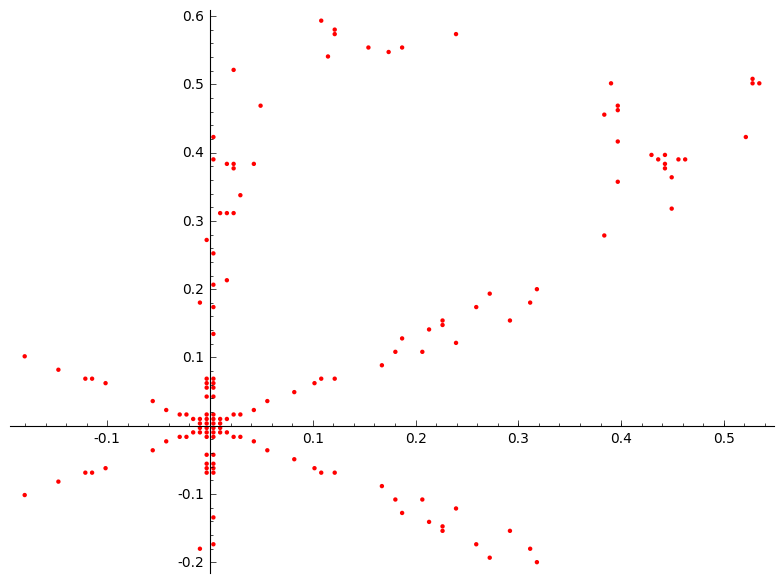

In [7]:
p = points(nconv, color='red')
p.show()

In [8]:
ishow3d([plotdens_ly(newton, (x,-0.2,0.6), (y,-0.2,0.6), plot_points=[nrpoints,nrpoints])]) # neue Version

In [1]:
%load_ext cython

In [1]:
%%cython
def cython_newton(double x,double y):
    cdef double z_real = 0.
    cdef double z_imag = 0.
    cdef int i
    cdef double eps=0.2
    cdef complex z
    cdef extern from "math.h":
        float atan2(float y, float x)
    z.real = x
    z.imag = y
    cdef int max_iterations=20
    for i in range(0,max_iterations):
        z = z - (z**3-1)/(3*z**2)
        if abs(z**3-1)<eps:
            return atan2(z.imag, z.real)
    return 10

In [1]:
# an den weissen Stellen konvergiert das Newton-Verfahren nicht
ishow3d([plotdens_ly(cython_newton, (-0.2,0.6), (-0.2,0.6), plot_points=(2000,2000))])

<h2>Aufgabe 8</h2>
Schreiben Sie eine Prozedur, die mit Hilfe einer Liste von Vektoren $v_1,v_2,w_1,w_2,w_3 \in \mathbb{R}^3$ die Gerade<br /> $$G:=\{ v_1+ \alpha v_2 \ | \ \alpha \in \mathbb{R} \}$$ und die Ebene $$ E:=\{ w_1+ \alpha w_2 +\beta w_3 \ | \ \alpha,\beta \in \mathbb{R} \}$$ in eine Grafik zeichnet. W&auml;hlen Sie die Parameter so, dass die Gerade die Ebene schneidet und markieren Sie den Schnittpunkt (z.B.: $\alpha \in (-5,5)$, $\beta \in (-4,4))$). &Uuml;berlegen Sie sich, wie man die Wahl der Parameter automatisieren kann; d.h. das die Darstellung des Schnittpunktes f&uuml;r beliebige Geraden/Ebenen funktioniert, ohne dass man als Nutzer selbst Parameter suchen muss. 

In [1]:
def ebenenplot(v1,v2,w1,w2,w3): #  Achtung, Plot sieht am Anfang komisch aus - einfach etwas bewegen, dann erscheint auch die Ebene
    var('a,b,c')
    sol = solve([(x == 0) for x in (w1+b*w2+c*w3 - v1-a*v2).list()],a,b,c, solution_dict=True)
    if len(sol)== 0: #kein Lösungen?
         ex_sol = false;
         sol = [{a:0,b:0,c:0}] #Alle Punkte sind gleichinteressant
    else: #unendlich viele Lösungen?
        ex_sol = true;
        if sol[0][a].is_symbol():
            sol = [{a:0,b:0,c:0}]
    #plotparameter ausrechnen: Um den Schnittpunkt Ebene und Gerade darstellen
    schnittpunkt = (v1+a*v2)(a=sol[0][a])  
    if ex_sol:
        p = point3d_ly([schnittpunkt])
        print "Ein Schnittpunkt ist " + str(schnittpunkt)
    R = {}
    for dim in [a,b,c]:
        R[dim] = (sol[0][dim]-3,sol[0][dim]+3)
    # Eigentliche Darstellung   
    plot1 = parametricplotline_ly(v1+a*v2, (a,R[a][0],R[a][1]))
    plot2 = parametricplot_ly(w1+b*w2+c*w3, (b,R[b][0],R[b][1]), (c,R[c][0],R[c][1]))
    ishow3d([p, plot1, plot2])

In [1]:
ebenenplot(vector([0,0,0]),vector([1,1,0]),vector([1,0,0]),vector([1,1,1]),vector([1,0,1]))

<h2>Aufgabe 9</h2>
Wir betrachten die folgende Oberfl&auml;che:  
$$ \begin{array}{rl}x (u,v) =& \cos(2u) \cos(u+v)\\y (u,v) =& \cos(2u) \sin(u+v)\\z (u,v) =& \sin (v) \end{array}$$<br />Stellen Sie die Oberfl&auml;che f&uuml;r $-\pi <u,v< \pi$ grafisch dar. W&auml;hlen Sie dabei eine Aufl&ouml;sung von $80$ Punkte pro Parameter.  

In [1]:
reset()
from sageplotly import *
var('u,v')

In [1]:
x(u,v) = cos(2*u)*cos(u+v)
y(u,v) = cos(2*u)*sin(u+v)
z(u,v) = sin(v)

In [1]:
ishow3d([parametricplot_ly([x,y,z], (u,-pi,pi), (v,-pi,pi), points=80)])

## Zusatzaufgabe: Aufgabe 10
Erweiterung Aufgabe 4  
Benutzen Sie explizit `piecewise`, um sowohl die st&uuml;ckweise Funktionen als auch ihre Ableitungen auszurechnen und darzustellen. Finden Sie heraus, wie man Piecewise benutzen kann, um die Funktionen zu zeichnen. Gestalten Sie den Plot so, dass er Legenden enth&auml;lt und die Endpunkte als Points darstellt. Letztendlich schreiben Sie das dann alles noch in eine kommentierte Funktion, die beliebige Anzahl von Intervall- und Funktionen-Tuple erhalten k&ouml;nnen soll. 

In [1]:
forget()
reset()
from sageplotly import *

In [1]:
def piecer(pieceslist):
    """ Berechnet aus einer gegebenen Liste von Intervall- Funktionstupeln die Ableitungen und stellt diese inklusive Endpunkte dar"""
    piece = piecewise(pieceslist) # piecewise-Funktion erzeugen
    pieceprime_list = [[domain, function.derivative()] for (domain, function) in piece.items()] # Ableitungen bestimmen
    pieceprime = piecewise(pieceprime_list)
    p = Graphics() # leeres Grafikobjekt
    # Finde geeignetes Intervall zum Plotten
    (unten1, oben1) = (pieceprime_list[0][0].inf(), pieceprime_list[0][0].sup())
    (unten2, oben2) = (pieceprime_list[len(pieceprime_list)-1][0].inf(), pieceprime_list[len(pieceprime_list)-1][0].sup())
    xmin_int = unten1
    xmax_int = oben2
    if xmin_int == -oo:
        xmin_int = -abs(1.5*oben1+2)
    if xmax_int == oo:
        xmax_int = abs(1.5*unten2+2)
    p += piece.plot((x, xmin_int, xmax_int),legend_label='Function') #plotte Funktion 
    p += pieceprime.plot((x, xmin_int, xmax_int), color='green',legend_label='Derivative') #plotte Ableitung
    # plotte alle Endpunkte <> oo
    p += add([point((i,piece(i)), color='red', size=20) for i in piece.end_points() if i <> unten1 and i <> oben2])
    p.show() #plotte
    #gebe Piecewise-Funktion zurueck
    return piece

In [1]:
f(x) = -x^2 + 2
g(x) = -4*sqrt(x) + 5
h(x) = 1/2*x^2-1/2*25-4*sqrt(5) + 5
piecer([[(-5,1),f],[[1,5],g],[(5,10),h]])

In [1]:
#das funktioniert jetzt auch mit Grenzen im Unendlichen
piecer([[(-oo,1),f],[[1,5],g],[(5,oo),h]])